In [ ]:
!pip install yfinance
!pip install schedule
!pip install pandas
!pip install tensorflow
!pip install matplotlib
!pip install scikit-learn


In [1]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ฟังก์ชันสำหรับดึงและประมวลผลข้อมูล
def fetch_and_process_data():
    tickers = ["AOT.BK", "XPG.BK", "PTTEP.BK", "KTB.BK", "KBANK.BK"]
    start_date = "2020-01-01"
    end_date = "2024-03-26"
    df_stocks = pd.DataFrame()

    for ticker in tickers:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        stock_data['MA5'] = stock_data['Close'].rolling(window=5).mean()
        stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
        stock_data_clean = stock_data.dropna()
        stock_data_clean['Ticker'] = ticker
        df_stocks = pd.concat([df_stocks, stock_data_clean], ignore_index=True)

In [2]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ฟังก์ชันสำหรับดึงและประมวลผลข้อมูล
def fetch_and_process_data():
    tickers = ["AOT.BK", "XPG.BK", "PTTEP.BK", "KTB.BK", "KBANK.BK"]
    start_date = "2020-01-01"
    end_date = "2024-03-26"
    df_stocks = pd.DataFrame()

    for ticker in tickers:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        stock_data['MA5'] = stock_data['Close'].rolling(window=5).mean()
        stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
        stock_data_clean = stock_data.dropna()
        stock_data_clean['Ticker'] = ticker
        df_stocks = pd.concat([df_stocks, stock_data_clean], ignore_index=True)

    # เลือก Features และ Target
    X = df_stocks[['MA5', 'MA20']]
    y = df_stocks['Close']

    # แบ่งชุดข้อมูลเป็นชุดฝึกฝนและชุดทดสอบ
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ปรับขนาด Features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# เรียกใช้ฟังก์ชันและรับข้อมูลที่ประมวลผลแล้ว
X_train_scaled, X_test_scaled, y_train, y_test = fetch_and_process_data()




[*********************100%%**********************]  1 of 1 completed
C:\Users\plam\AppData\Local\Temp\ipykernel_4696\4152779585.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_clean['Ticker'] = ticker
[*********************100%%**********************]  1 of 1 completed
C:\Users\plam\AppData\Local\Temp\ipykernel_4696\4152779585.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_clean['Ticker'] = ticker
[*********************100%%**********************]  1 of 1 completed
C:\Users\

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Dropout, GRU, Flatten
 
 
 

ขนาดก่อน np.newaxis:  (4028, 2) (1007, 2)


c:\Users\plam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/80
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.0000e+00 - loss: 5224.5825 - val_accuracy: 9.9305e-04 - val_loss: 135.7388
Epoch 2/80
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0012 - loss: 184.1124 - val_accuracy: 9.9305e-04 - val_loss: 20.4422
Epoch 3/80
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 5.4102e-04 - loss: 126.3110 - val_accuracy: 0.0000e+00 - val_loss: 14.1509
Epoch 4/80
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.8032e-05 - loss: 121.4113 - val_accuracy: 0.0000e+00 - val_loss: 23.1452
Epoch 5/80
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 3.8572e-04 - loss: 125.2066 - val_accuracy: 0.0000e+00 - val_loss: 15.1275
Epoch 6/80
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.5964e-05 - loss: 113.9936 - val_accuracy: 0.0000e+00 - val_loss: 14.1506
Epoch 7/80
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: 100.4631 - val_accuracy: 0.0000e+00 - val_loss: 8.3214
Epoch 8/80
126/126 ━━━━━━━━━

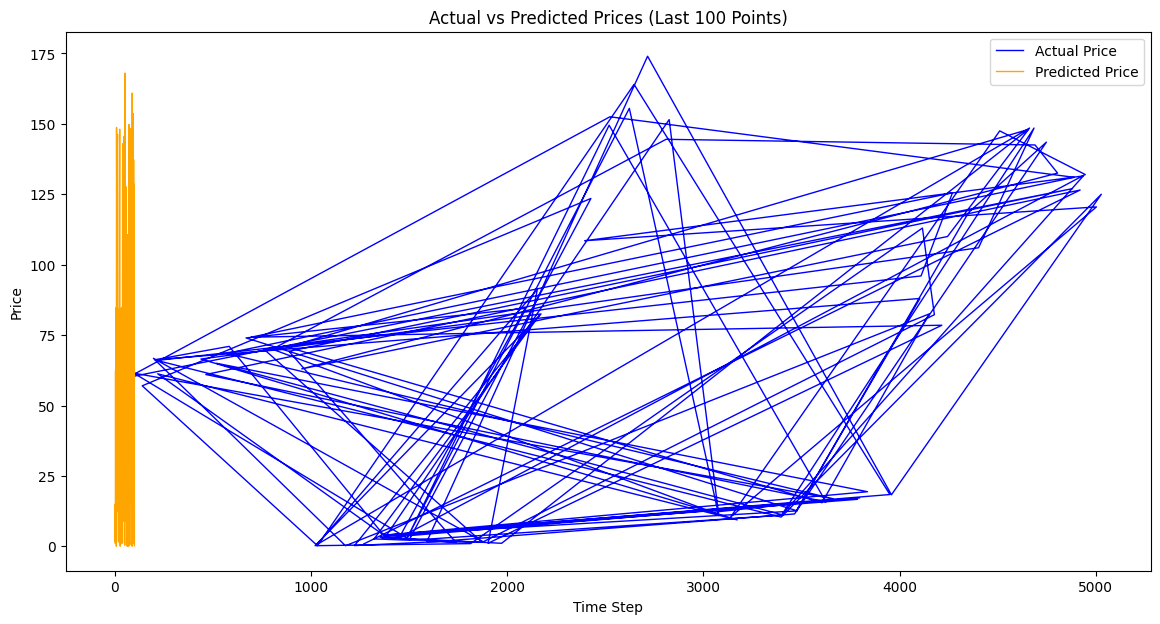

In [4]:
import numpy as np
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, GRU, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

print("ขนาดก่อน np.newaxis: ", X_train_scaled.shape, X_test_scaled.shape)


# กำหนดโครงสร้างของโมเดล
model = Sequential([
    Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=1),
    LSTM(100, return_sequences=True),
    Dropout(0.5),
    GRU(100, return_sequences=True),
    Dropout(0.5),
    GRU(100),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dense(1)
])

# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# ฝึกฝนโมเดล
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=80, batch_size=32, verbose=1)

# ประเมินโมเดล
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'ค่า Loss ทดสอบ: {test_loss}, ความแม่นยำทดสอบ: {test_accuracy}')

# ทำนายราคาหุ้น
ราคาทำนาย = model.predict(X_test_scaled).flatten()

# ตรวจสอบการทำนายก่อนการพล็อต
print(ราคาทำนาย[:5])  # พิมพ์การทำนาย 5 ค่าแรก
print(y_test[:5])  # พิมพ์ค่าจริง 5 ค่าแรก

# เราจะพลอต1000จุด
num_points_to_plot = 100

# ตรวจสอบและตัดตัวอย่างข้อมูล
# สำหรับข้อมูลที่เป็นปัจจุบันที่สุด เราจะใช้ส่วนท้ายของ array
y_test_sample = y_test[-num_points_to_plot:]
predicted_prices_sample = ราคาทำนาย[-num_points_to_plot:]

# สร้างกราฟเพื่อเปรียบเทียบราคาจริงกับราคาที่ทำนายได้
plt.figure(figsize=(14, 7))
plt.plot(y_test_sample, label='Actual Price', color='blue', linewidth=1)
plt.plot(predicted_prices_sample, label='Predicted Price', color='orange', linewidth=1)
plt.title('Actual vs Predicted Prices (Last 100 Points)')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.show()


In [5]:
model.save('C:/Users/plam/Desktop/project ml/modelForML.h5')  # บันทึกโมเดลไปยังไฟล์ .h5


In [6]:
from keras.models import load_model

model = load_model('C:/Users/plam/Desktop/project ml/modelForML.h5')  # โหลดโมเดลจากไฟล์ .h5
